# Resilience

## Import Library and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import plotly.express as px
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.base import TransformerMixin, BaseEstimator

import folium

In [2]:
path = '/Users/utilisateur/Documents/Le_Wagon/Resilience/CDP-Cities-KPI.csv'
#path = '../raw_data/CDP-Cities-KPI.csv'
kpi_data = pd.read_csv(path)

In [3]:
kpi = kpi_data.drop_duplicates(subset = 'Account.Number', keep = 'first', inplace = False).copy().reset_index()
kpi = kpi.drop('index', axis = 1)

In [4]:
kpi_new = kpi.copy()

In [5]:
kpi

Unnamed: 0  Year.Reported.to.CDP  Account.Number  \
0             1                  2020           49335   
1             2                  2020           60278   
2             3                  2020           57509   
3             4                  2020           60114   
4             5                  2020           32550   
..          ...                   ...             ...   
561         611                  2020           35874   
562         612                  2020           42178   
563         613                  2020          848129   
564         614                  2020           54632   
565         615                  2020          831674   

                                          Organization           City  \
0    Metropolitan Government of Nashville and David...      Nashville   
1                          Prefeitura de Fernandópolis  Fernandópolis   
2                                   Prefeitura Niterói        Niterói   
3                                       City of Gdynia         Gdynia   
4                                       City of Denver         Denver   
..                                                 ...            ...   
561                                    City of Phoenix        Phoenix   
562                    Distrito Metropolitano de Quito          Quito   
563                                            Esquías            NaN   
564                              Prefeitura de Caruaru        Caruaru   
565                              Município de Amarante       Amarante   

                      Country     CDP.Region First.Time.Discloser  Population  \
0    United States of America  North America                   No    692587.0   
1                      Brazil  Latin America                   No     68823.0   
2                      Brazil  Latin America                   No    513584.0   
3                      Poland         Europe                   No    246348.0   
4    United States of America  North America                   No    716492.0   
..                        ...            ...                  ...         ...   
561  United States of America  North America                   No   1660272.0   
562                   Ecuador  Latin America                   No   2239191.0   
563                  Honduras  Latin America                  Yes     18308.0   
564                    Brazil  Latin America                   No    314912.0   
565                  Portugal         Europe                   No     56217.0   

                 City.Location        Sustainability.Targets.Master.Planning  \
0     POINT (-86.7816 36.1627)                                           Yes   
1    POINT (-50.2475 -20.2858)  Intending to incorporate in the next 2 years   
2    POINT (-43.1184 -22.8928)                                           Yes   
3      POINT (18.5305 54.5189)                                           Yes   
4     POINT (-104.985 39.7376)                                           Yes   
..                         ...                                           ...   
561   POINT (-112.074 33.4484)                                           Yes   
562   POINT (-78.5167 -0.2333)                                           Yes   
563                        NaN                                   In progress   
564                        NaN  Intending to incorporate in the next 2 years   
565                        NaN                                   Do not know   

                        Risk.Assessment.Actions  Nb.Hazards.Type  \
0                                           Yes              3.0   
1    Intending to undertake in the next 2 years              2.0   
2                                           Yes              9.0   
3                                           Yes              5.0   
4                                           Yes              4.0   
..                                          ...              ...   
561                              

## Computing the targets

### Sustainability.Targets.Master.Planning

"Yes"=3, 
"In progress"=2,
"Intending to incorporate in the next 2 years"=1,
"Not intending to undertake"=0,
"Do not know"=0
"NaN"=0

In [6]:
def note_sustainability_target(x):
    if x == "Yes":
        return 3
    elif x == "In progress":
        return 2
    elif x =="Intending to incorporate in the next 2 years":
        return 1
    elif x == "Not intending to undertake":
        return 0
    elif x == "Do not know":
        return 0
    else:
        return 0

In [7]:
def minmax_sus(x):
    mini = 0
    maxi = 3
    return (x-mini)/(maxi-mini)

In [8]:
kpi_new['Sustainability.Targets.Master.Planning'] = kpi_new['Sustainability.Targets.Master.Planning'].apply(note_sustainability_target)

In [9]:
kpi_new['Sustainability.Targets.Master.Planning'] = kpi_new['Sustainability.Targets.Master.Planning'].apply(minmax_sus)

### Risk.Assessment.Actions","Adaptation.Plan" ...

"Yes"=3, 
"In progress"=2,
"Intending to undertake in the next 2 years"=1,
"Not intending to undertake"=0,
"Do not know"=0

In [10]:
def note_bunch(x):
    if x == "Yes":
        return 3
    elif x == "In progress":
        return 2
    elif x =="Intending to undertake in the next 2 years":
        return 1
    elif x == "Not intending to undertake":
        return 0
    elif x == "Do not know":
        return 0
    else:
        return 0

In [11]:
def minmax_bunch(x):
    mini = 0
    maxi = 3
    return (x-mini)/(maxi-mini)

In [12]:
bunch_col = ["Risk.Assessment.Actions","Adaptation.Plan" ,"City.Wide.Emissions.Inventory","GHG.Emissions.Consumption",
              "GHG.Emissions.External.Verification","Emissions.Reductions.Mitigation.Planning",
              "Opportunities.Collaboration","Renewable.Energy.Target","Energy.Efficnecy.Target",
              "Water.Resource.Management.strategy"]
for i in bunch_col:
    kpi_new[i] = kpi_new[i].apply(note_sustainability_target)
    kpi_new[i] = kpi_new[i].apply(minmax_bunch)

In [13]:
kpi_new[["Risk.Assessment.Actions","Adaptation.Plan" ,"City.Wide.Emissions.Inventory","GHG.Emissions.Consumption",
              "GHG.Emissions.External.Verification","Emissions.Reductions.Mitigation.Planning",
              "Opportunities.Collaboration","Renewable.Energy.Target","Energy.Efficnecy.Target",
              "Water.Resource.Management.strategy"]]

Risk.Assessment.Actions  Adaptation.Plan  City.Wide.Emissions.Inventory  \
0                        1.0         0.666667                       1.000000   
1                        0.0         0.000000                       1.000000   
2                        1.0         1.000000                       1.000000   
3                        1.0         1.000000                       0.000000   
4                        1.0         1.000000                       1.000000   
..                       ...              ...                            ...   
561                      1.0         1.000000                       1.000000   
562                      1.0         1.000000                       0.666667   
563                      1.0         0.000000                       0.000000   
564                      0.0         0.000000                       0.000000   
565                      1.0         1.000000                       0.000000   

     GHG.Emissions.Consumption  GHG.Emissions.External.Verification  \
0                          0.0                             0.000000   
1                          0.0                             0.000000   
2                          0.0                             1.000000   
3                          0.0                             0.000000   
4                          1.0                             0.666667   
..                         ...                                  ...   
561                        0.0                             0.000000   
562                        0.0                             0.000000   
563                        0.0                             0.000000   
564                        0.0                             0.000000   
565                        0.0                             0.000000   

     Emissions.Reductions.Mitigation.Planning  Opportunities.Collaboration  \
0                                    1.000000                          1.0   
1                                    0.000000                          1.0   
2                                    0.666667                          1.0   
3                                    1.000000                          0.0   
4                                    1.000000                          1.0   
..                                        ...                          ...   
561                                  0.666667                          1.0   
562                                  1.000000                          1.0   
563                                  0.000000                          0.0   
564                                  0.000000                          1.0   
565                                  0.000000                          0.0   

     Renewable.Energy.Target  Energy.Efficnecy.Target  \
0                   1.000000                 1.000000   
1                   0.666667                 0.666667   
2                   0.000000                 0.000000   
3                   1.000000                 0.000000   
4                   1.000000                 0.666667   
..                       ...                      ...   
561                 1.000000                 1.000000   
562                 0.666667                 0.666667   
563                 0.000000                 0.000000   
564                 0.000000                 0.000000   
565                 0.000000                 0.000000   

     Water.Resource.Management.strategy  
0                              0.000000  
1                              0.666667  
2                              1.000000  
3                              0.000000  
4                              0.000000  
..                                  ...  
561                            1.000000  
562                            1.000000  
563                            0.000000  
564                            1.000000  
565                            0.666667  

[566 rows x 10 columns]

### Low.Zero.Emission.Zone","Food.Consumption.Policies

"Yes" = 1
"No" = 0
"Do not know" =0
"NaN" = 0

In [14]:
def note_low_food(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0
    elif x == "Do not know":
        return 0
    else:
        return 0

In [15]:
def minmax_binaire(x):
    mini = 0
    maxi = 1
    return (x-mini)/(maxi-mini)

In [16]:
kpi_new['Low.Zero.Emission.Zone'] = kpi_new['Low.Zero.Emission.Zone'].apply(note_low_food)

In [17]:
kpi_new['Low.Zero.Emission.Zone'] = kpi_new['Low.Zero.Emission.Zone'].apply(minmax_binaire)

In [18]:
kpi_new['Food.Consumption.Policies'] = kpi_new['Food.Consumption.Policies'].apply(note_low_food)

In [19]:
kpi_new['Food.Consumption.Policies']= kpi_new['Food.Consumption.Policies'].apply(minmax_binaire)

### GHG.Emissions.Reductions.Targets

"1"= "Base year emissions (absolute) target","Base year intensity target","Baseline scenario (business as usual) target","Fixed level target"
"0" = "No target"
"0" = "NaN"

In [20]:
def note_emi_red(x):
    if x == "Base year emissions (absolute) target":
        return 1
    elif x == "Base year intensity target":
        return 1
    elif x == "Baseline scenario (business as usual) target":
        return 1
    elif x == "Fixed level target":
        return 1
    elif x == "No target":
        return 0
    else:
        return 0

In [21]:
kpi_new['GHG.Emissions.Reductions.Targets'] = kpi_new['GHG.Emissions.Reductions.Targets'].apply(note_emi_red)

In [22]:
kpi_new['GHG.Emissions.Reductions.Targets'] = kpi_new['GHG.Emissions.Reductions.Targets'].apply(minmax_binaire)

### GHG.Emissions.Evolution

"2"="Decreased",
"1"=  "Stayed the same",
"0" = "Do not know","This is our first year of calculation", "Increased"
"0" = "NaN"

In [23]:
def note_emi_evo(x):
    if x == "Decreased":
        return 2
    elif x == "Stayed the same":
        return 1
    elif x == "Increased":
        return 0
    elif x == "Do not know":
        return 0
    elif x == "This is our first year of calculation":
        return 0
    else:
        return 0

In [24]:
def minmax_em_evo(x):
    mini = 0
    maxi = 2
    return (x-mini)/(maxi-mini)

In [25]:
kpi_new['GHG.Emissions.Evolution'] = kpi_new['GHG.Emissions.Evolution'].apply(note_emi_evo)

In [26]:
kpi_new['GHG.Emissions.Evolution'] = kpi_new['GHG.Emissions.Evolution'].apply(minmax_em_evo)

### Electricity.Source.Renewable

In [27]:
def minmax_energy(x):
    if np.isnan(x):
        x = 0
    mini = 0
    maxi = 100
    return (x-mini)/(maxi-mini)

In [28]:
kpi_new['Electricity.Source.Renewable'] = kpi_new['Electricity.Source.Renewable'].apply(minmax_energy)

## City.Readiness.Index

In [29]:
kpi_new['City.Readiness.Index']= kpi_new[["Sustainability.Targets.Master.Planning", "Risk.Assessment.Actions",
                                            "Adaptation.Plan","GHG.Emissions.Consumption","GHG.Emissions.External.Verification",
                                            "Emissions.Reductions.Mitigation.Planning", "Opportunities.Collaboration",
                                            "Renewable.Energy.Target","Energy.Efficnecy.Target",
                                            "Water.Resource.Management.strategy","Low.Zero.Emission.Zone",
                                            "GHG.Emissions.Evolution","GHG.Emissions.Reductions.Targets",
                                            "Electricity.Source.Renewable", "Food.Consumption.Policies",
                                            "City.Wide.Emissions.Inventory"]].mean(axis =1)

## Vulnerability Index

In [30]:
kpi_new['Risk.Health.System'] = kpi_new['Risk.Health.System'].apply(note_low_food)

In [31]:
kpi_new['Risk.Health.System'] = kpi_new['Risk.Health.System'].apply(minmax_binaire)

In [32]:
def cleanan(x):
    if pd.isna(x):
        return 0
    else:
        return x

In [33]:
kpi_new['Potable.Water.Supply.Percent'] = kpi_new['Potable.Water.Supply.Percent'].apply(cleanan)

In [34]:
kpi_new['Potable.Water.Supply.Vulnerability'] = 100-kpi_new['Potable.Water.Supply.Percent']

In [35]:
kpi_new['Potable.Water.Supply.Vulnerability'] = kpi_new['Potable.Water.Supply.Vulnerability'].apply(minmax_energy)

In [36]:
def minmax_hazard(x):
    mini = 0
    maxi = 352
    return (x-mini)/(maxi-mini)

In [37]:
kpi_new['Hazards.Exposure.Level'] = kpi_new['Hazards.Exposure.Level'].apply(cleanan)

In [38]:
kpi_new['Hazards.Exposure.Level'] = kpi_new['Hazards.Exposure.Level'].apply(minmax_hazard)

In [39]:
def minmax_adaptation(x):
    mini = 0
    maxi = 8
    return (x-mini)/(maxi-mini)

In [40]:
kpi_new['Adaptation.Challenges.Level'] = kpi_new['Adaptation.Challenges.Level'].apply(cleanan)

In [41]:
kpi_new['Adaptation.Challenges.Index'] = kpi_new['Adaptation.Challenges.Level'].apply(minmax_adaptation)

In [42]:
kpi_new['Sensitivity.Index']=(kpi_new['Risk.Health.System'] + kpi_new['Potable.Water.Supply.Vulnerability'])/2

In [43]:
kpi_new['Vulnerability']=(kpi_new['Hazards.Exposure.Level']+kpi_new['Adaptation.Challenges.Index']+kpi_new['Sensitivity.Index'])/3

#### Scatterplot regarding the Health Systems by Country

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

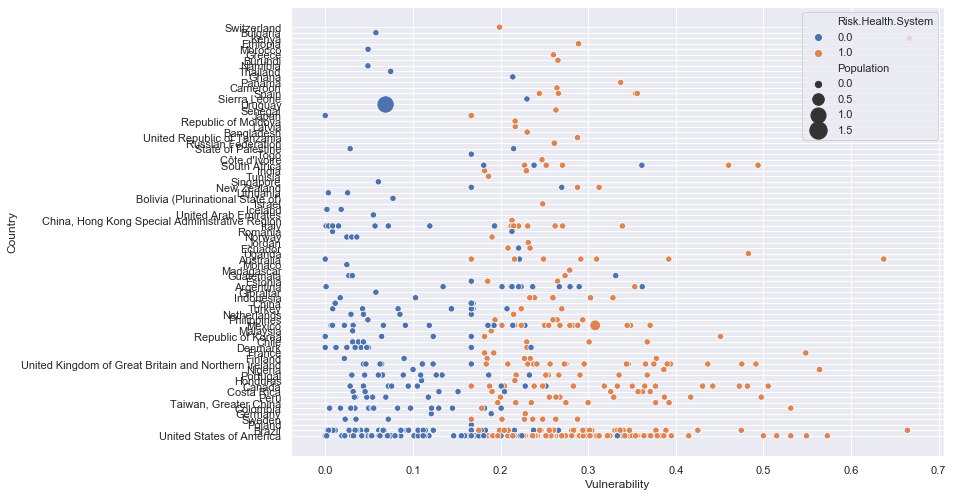

In [45]:
sns.scatterplot(y=kpi_new['Country'],x = kpi_new['Vulnerability'],size=kpi_new['Population'],hue=kpi_new['Risk.Health.System'],sizes=(40, 300));

#### Scatter plot of Vulnerability and Readiness

In [46]:
px.scatter(kpi_new, x = 'City.Readiness.Index', y = 'Vulnerability', hover_data=['Organization'])

In [47]:
kpi_new

Unnamed: 0  Year.Reported.to.CDP  Account.Number  \
0             1                  2020           49335   
1             2                  2020           60278   
2             3                  2020           57509   
3             4                  2020           60114   
4             5                  2020           32550   
..          ...                   ...             ...   
561         611                  2020           35874   
562         612                  2020           42178   
563         613                  2020          848129   
564         614                  2020           54632   
565         615                  2020          831674   

                                          Organization           City  \
0    Metropolitan Government of Nashville and David...      Nashville   
1                          Prefeitura de Fernandópolis  Fernandópolis   
2                                   Prefeitura Niterói        Niterói   
3                                       City of Gdynia         Gdynia   
4                                       City of Denver         Denver   
..                                                 ...            ...   
561                                    City of Phoenix        Phoenix   
562                    Distrito Metropolitano de Quito          Quito   
563                                            Esquías            NaN   
564                              Prefeitura de Caruaru        Caruaru   
565                              Município de Amarante       Amarante   

                      Country     CDP.Region First.Time.Discloser  Population  \
0    United States of America  North America                   No    692587.0   
1                      Brazil  Latin America                   No     68823.0   
2                      Brazil  Latin America                   No    513584.0   
3                      Poland         Europe                   No    246348.0   
4    United States of America  North America                   No    716492.0   
..                        ...            ...                  ...         ...   
561  United States of America  North America                   No   1660272.0   
562                   Ecuador  Latin America                   No   2239191.0   
563                  Honduras  Latin America                  Yes     18308.0   
564                    Brazil  Latin America                   No    314912.0   
565                  Portugal         Europe                   No     56217.0   

                 City.Location  Sustainability.Targets.Master.Planning  \
0     POINT (-86.7816 36.1627)                                1.000000   
1    POINT (-50.2475 -20.2858)                                0.333333   
2    POINT (-43.1184 -22.8928)                                1.000000   
3      POINT (18.5305 54.5189)                                1.000000   
4     POINT (-104.985 39.7376)                                1.000000   
..                         ...                                     ...   
561   POINT (-112.074 33.4484)                                1.000000   
562   POINT (-78.5167 -0.2333)                                1.000000   
563                        NaN                                0.666667   
564                        NaN                                0.333333   
565                        NaN                                0.000000   

     Risk.Assessment.Actions  Nb.Hazards.Type  Hazards.Exposure.Level  \
0                        1.0              3.0                0.116477   
1                        0.0              2.0                0.034091   
2                        1.0              9.0                0.343750   
3                        1.0              5.0                0.000000   
4                        1.0              4.0                0.184659   
..                       ...              ...                     ...   
561                      1.0              5.0                0.210227 

## Initial DataFrame, a.k.a with the targets

In [48]:
city_index = kpi_new[['Account.Number', 'City.Readiness.Index', 'Vulnerability']].copy()

In [49]:
raw_index = pd.concat([kpi, city_index.drop('Account.Number', axis = 1)], axis =1 )

In [50]:
raw_index

Unnamed: 0  Year.Reported.to.CDP  Account.Number  \
0             1                  2020           49335   
1             2                  2020           60278   
2             3                  2020           57509   
3             4                  2020           60114   
4             5                  2020           32550   
..          ...                   ...             ...   
561         611                  2020           35874   
562         612                  2020           42178   
563         613                  2020          848129   
564         614                  2020           54632   
565         615                  2020          831674   

                                          Organization           City  \
0    Metropolitan Government of Nashville and David...      Nashville   
1                          Prefeitura de Fernandópolis  Fernandópolis   
2                                   Prefeitura Niterói        Niterói   
3                                       City of Gdynia         Gdynia   
4                                       City of Denver         Denver   
..                                                 ...            ...   
561                                    City of Phoenix        Phoenix   
562                    Distrito Metropolitano de Quito          Quito   
563                                            Esquías            NaN   
564                              Prefeitura de Caruaru        Caruaru   
565                              Município de Amarante       Amarante   

                      Country     CDP.Region First.Time.Discloser  Population  \
0    United States of America  North America                   No    692587.0   
1                      Brazil  Latin America                   No     68823.0   
2                      Brazil  Latin America                   No    513584.0   
3                      Poland         Europe                   No    246348.0   
4    United States of America  North America                   No    716492.0   
..                        ...            ...                  ...         ...   
561  United States of America  North America                   No   1660272.0   
562                   Ecuador  Latin America                   No   2239191.0   
563                  Honduras  Latin America                  Yes     18308.0   
564                    Brazil  Latin America                   No    314912.0   
565                  Portugal         Europe                   No     56217.0   

                 City.Location        Sustainability.Targets.Master.Planning  \
0     POINT (-86.7816 36.1627)                                           Yes   
1    POINT (-50.2475 -20.2858)  Intending to incorporate in the next 2 years   
2    POINT (-43.1184 -22.8928)                                           Yes   
3      POINT (18.5305 54.5189)                                           Yes   
4     POINT (-104.985 39.7376)                                           Yes   
..                         ...                                           ...   
561   POINT (-112.074 33.4484)                                           Yes   
562   POINT (-78.5167 -0.2333)                                           Yes   
563                        NaN                                   In progress   
564                        NaN  Intending to incorporate in the next 2 years   
565                        NaN                                   Do not know   

                        Risk.Assessment.Actions  Nb.Hazards.Type  \
0                                           Yes              3.0   
1    Intending to undertake in the next 2 years              2.0   
2                                           Yes              9.0   
3                                           Yes              5.0   
4                                           Yes              4.0   
..                                          ...              ...   
561                              

#### Map to show three different kinds of cities according to their Readiness

def colorlabel(x):
    if x <= 0.33:
        return 'red'
    elif (x > 0.33) and (x <=0.66):
        return 'orange'
    elif x > 0.66 :
        return 'green'
    else:
        return 'black'

m = folium.Map(location=[45.5236, -122.6750])

df = raw_index.copy()

for i in df.iterrows():
    couleur = colorlabel(i[1][58])
    lat=i[1][55]
    lon=i[1][56]
    txt=f'readiness score:{i[1][58]} \n vulnerability score:{i[1][59]} \n Orga:{i[1][3]}'
    
    #folium.Marker(
    folium.CircleMarker(
    
    location=[lat,lon],
    popup=txt,
    #icon=folium.Icon(color=couleur)
     
    radius=5,
    
    color=couleur,
    fill=True,
    fill_color='gray'   
        
    
    ).add_to(m)

## Selection of the Features to keep

### Feature selection according to features' importance when doing linear regressions

In [51]:
dummy_kpi = kpi_new.copy()
dummy_kpi['Dummy_Index'] = (dummy_kpi['Vulnerability'] + dummy_kpi['City.Readiness.Index'])/2
dummy_kpi['Harmonic_Index'] = ((1-dummy_kpi['Vulnerability']) * dummy_kpi['City.Readiness.Index'])/((1-dummy_kpi['Vulnerability']) + dummy_kpi['City.Readiness.Index'])

In [52]:
fig = px.scatter(dummy_kpi, x = dummy_kpi['City.Readiness.Index'], y = dummy_kpi['Harmonic_Index'], hover_data = ['Organization'])
fig.show()

In [53]:
X = kpi_new[['Hazards.Exposure.Level', 'Risk.Health.System', 'Adaptation.Challenges.Index','Potable.Water.Supply.Vulnerability', 
               "Sustainability.Targets.Master.Planning", 
               "Risk.Assessment.Actions","Adaptation.Plan","GHG.Emissions.Consumption","GHG.Emissions.External.Verification",
               "Emissions.Reductions.Mitigation.Planning", "Opportunities.Collaboration","Renewable.Energy.Target",
               "Energy.Efficnecy.Target","Water.Resource.Management.strategy","Low.Zero.Emission.Zone","GHG.Emissions.Evolution",
               "GHG.Emissions.Reductions.Targets","Electricity.Source.Renewable", 
               "Food.Consumption.Policies","City.Wide.Emissions.Inventory" ]]

In [54]:
y1 = kpi_new['Vulnerability']
y2 = kpi_new['City.Readiness.Index']

#### Simple Linear Regression model for Vulnerability

Feature: 0, Score: 0.33333 Hazards.Exposure.Level
Feature: 1, Score: 0.16667 Risk.Health.System
Feature: 2, Score: 0.33333 Adaptation.Challenges.Index
Feature: 3, Score: 0.16667 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.00000 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.00000 Risk.Assessment.Actions
Feature: 6, Score: 0.00000 Adaptation.Plan
Feature: 7, Score: -0.00000 GHG.Emissions.Consumption
Feature: 8, Score: -0.00000 GHG.Emissions.External.Verification
Feature: 9, Score: -0.00000 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: -0.00000 Opportunities.Collaboration
Feature: 11, Score: 0.00000 Renewable.Energy.Target
Feature: 12, Score: -0.00000 Energy.Efficnecy.Target
Feature: 13, Score: -0.00000 Water.Resource.Management.strategy
Feature: 14, Score: -0.00000 Low.Zero.Emission.Zone
Feature: 15, Score: -0.00000 GHG.Emissions.Evolution
Feature: 16, Score: -0.00000 GHG.Emissions.Reductions.Targets
Feature: 17, Score: -0.00000 Electricity.Source

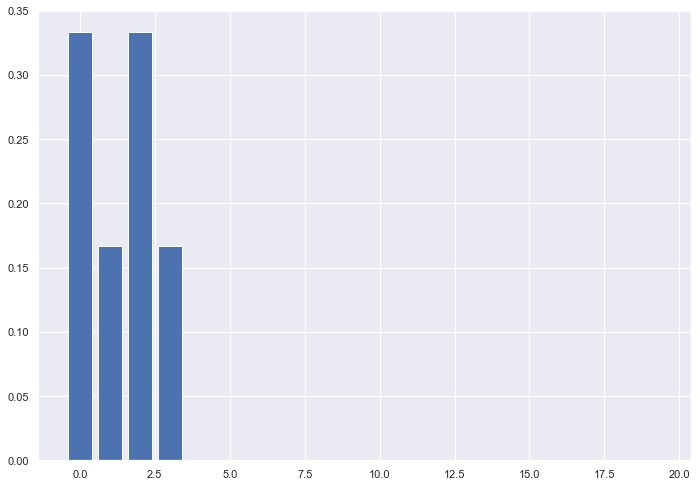

In [55]:
model = LinearRegression()
# fit the model
model.fit(X, y1)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v), f'{X.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Simple Linear Regression model for Readiness

Feature: 0, Score: -0.00000 Hazards.Exposure.Level
Feature: 1, Score: 0.00000 Risk.Health.System
Feature: 2, Score: -0.00000 Adaptation.Challenges.Index
Feature: 3, Score: 0.00000 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.06250 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.06250 Risk.Assessment.Actions
Feature: 6, Score: 0.06250 Adaptation.Plan
Feature: 7, Score: 0.06250 GHG.Emissions.Consumption
Feature: 8, Score: 0.06250 GHG.Emissions.External.Verification
Feature: 9, Score: 0.06250 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.06250 Opportunities.Collaboration
Feature: 11, Score: 0.06250 Renewable.Energy.Target
Feature: 12, Score: 0.06250 Energy.Efficnecy.Target
Feature: 13, Score: 0.06250 Water.Resource.Management.strategy
Feature: 14, Score: 0.06250 Low.Zero.Emission.Zone
Feature: 15, Score: 0.06250 GHG.Emissions.Evolution
Feature: 16, Score: 0.06250 GHG.Emissions.Reductions.Targets
Feature: 17, Score: 0.06250 Electricity.Source.Renewab

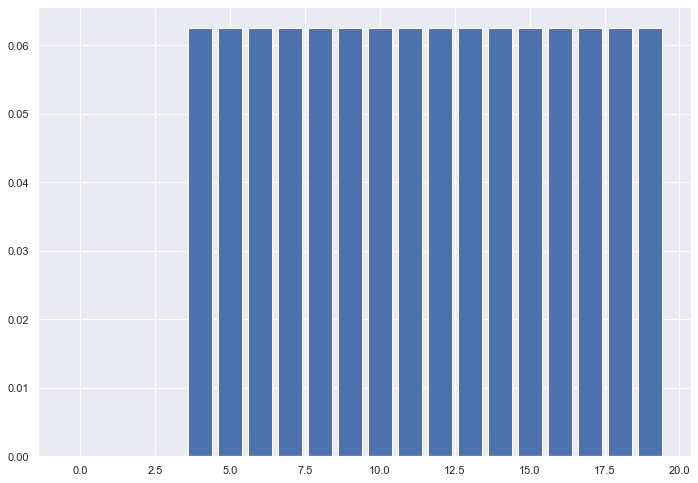

In [56]:
model = LinearRegression()

model.fit(X, y2)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v), f'{X.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### XGBoost Regression model for Vulnerability

[18:58:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.04305 Hazards.Exposure.Level
Feature: 1, Score: 0.77144 Risk.Health.System
Feature: 2, Score: 0.10070 Adaptation.Challenges.Index
Feature: 3, Score: 0.07296 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.00028 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.00066 Risk.Assessment.Actions
Feature: 6, Score: 0.00062 Adaptation.Plan
Feature: 7, Score: 0.00010 GHG.Emissions.Consumption
Feature: 8, Score: 0.00167 GHG.Emissions.External.Verification
Feature: 9, Score: 0.00012 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.00000 Opportunities.Collaboration
Feature: 11, Score: 0.00063 Renewable.Energy.Target
Feature: 12, Score: 0.00131 Energy.Efficnecy.Target
Feature: 13, Score: 0.00000 Water.Resource.Management.strategy
Feature: 14, Score: 0.00031 Low.Zero.Emission.Zone
Feature: 15, Score: 0.00078 GHG.Emissions.Evolution
F

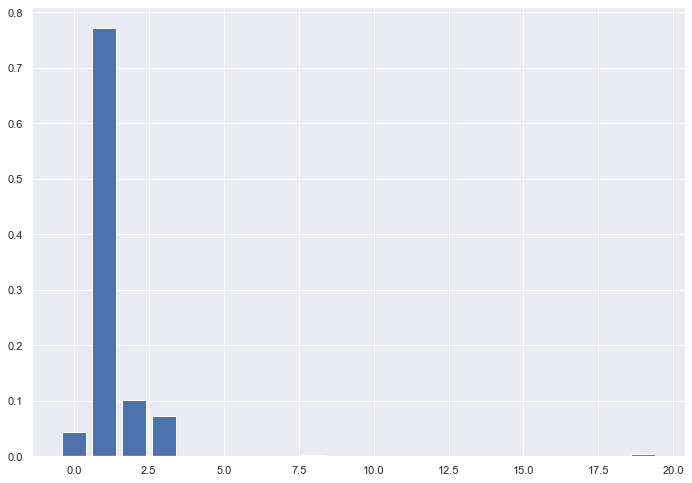

In [57]:
model = XGBRegressor()
# fit the model
model.fit(X, y1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v), f'{X.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### XGBoost Regression model for Readiness

[18:58:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.00022 Hazards.Exposure.Level
Feature: 1, Score: 0.00054 Risk.Health.System
Feature: 2, Score: 0.00012 Adaptation.Challenges.Index
Feature: 3, Score: 0.00031 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.01006 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.02354 Risk.Assessment.Actions
Feature: 6, Score: 0.05909 Adaptation.Plan
Feature: 7, Score: 0.00853 GHG.Emissions.Consumption
Feature: 8, Score: 0.02340 GHG.Emissions.External.Verification
Feature: 9, Score: 0.22598 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.06476 Opportunities.Collaboration
Feature: 11, Score: 0.09581 Renewable.Energy.Target
Feature: 12, Score: 0.04752 Energy.Efficnecy.Target
Feature: 13, Score: 0.01652 Water.Resource.Management.strategy
Feature: 14, Score: 0.00688 Low.Zero.Emission.Zone
Feature: 15, Score: 0.04328 GHG.Emissions.Evolution
F

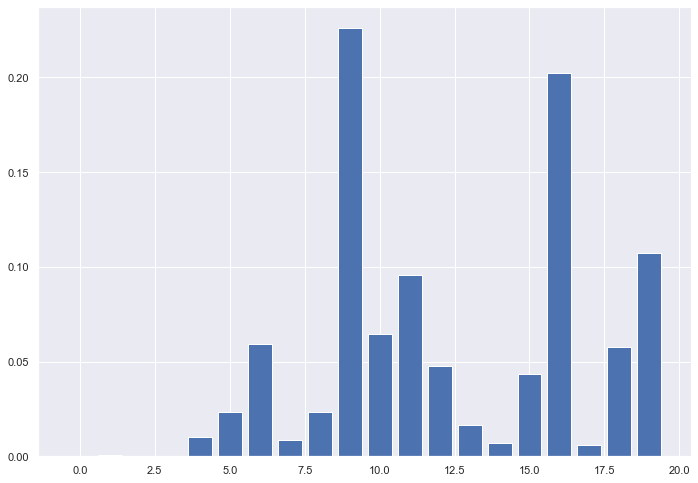

In [58]:
model = XGBRegressor()
# fit the model
model.fit(X, y2)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v),f'{X.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Feature selection in regards to targets mixing Vulnerability and Readiness

In [59]:
X_dummy = dummy_kpi[['Hazards.Exposure.Level', 'Risk.Health.System', 'Adaptation.Challenges.Index','Potable.Water.Supply.Vulnerability', 
               "Sustainability.Targets.Master.Planning", 
               "Risk.Assessment.Actions","Adaptation.Plan","GHG.Emissions.Consumption","GHG.Emissions.External.Verification",
               "Emissions.Reductions.Mitigation.Planning", "Opportunities.Collaboration","Renewable.Energy.Target",
               "Energy.Efficnecy.Target","Water.Resource.Management.strategy","Low.Zero.Emission.Zone","GHG.Emissions.Evolution",
               "GHG.Emissions.Reductions.Targets","Electricity.Source.Renewable", 
               "Food.Consumption.Policies","City.Wide.Emissions.Inventory" ]]
y_dummy1 = dummy_kpi['Dummy_Index']
y_dummy2 = dummy_kpi['Harmonic_Index']

#### Simple Linear Regression model for the simple mean of Readiness and Vulnerability

Feature: 0, Score: 0.16667 Hazards.Exposure.Level
Feature: 1, Score: 0.08333 Risk.Health.System
Feature: 2, Score: 0.16667 Adaptation.Challenges.Index
Feature: 3, Score: 0.08333 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.03125 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.03125 Risk.Assessment.Actions
Feature: 6, Score: 0.03125 Adaptation.Plan
Feature: 7, Score: 0.03125 GHG.Emissions.Consumption
Feature: 8, Score: 0.03125 GHG.Emissions.External.Verification
Feature: 9, Score: 0.03125 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.03125 Opportunities.Collaboration
Feature: 11, Score: 0.03125 Renewable.Energy.Target
Feature: 12, Score: 0.03125 Energy.Efficnecy.Target
Feature: 13, Score: 0.03125 Water.Resource.Management.strategy
Feature: 14, Score: 0.03125 Low.Zero.Emission.Zone
Feature: 15, Score: 0.03125 GHG.Emissions.Evolution
Feature: 16, Score: 0.03125 GHG.Emissions.Reductions.Targets
Feature: 17, Score: 0.03125 Electricity.Source.Renewable

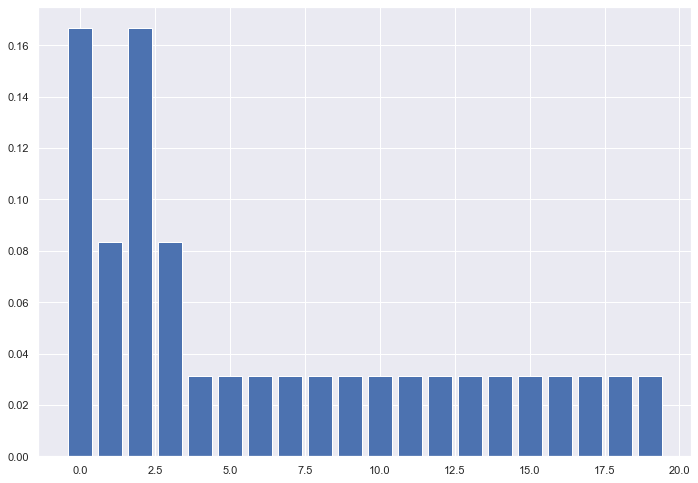

In [60]:
model = LinearRegression()
# fit the model
model.fit(X_dummy, y_dummy1)
# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v), f'{X_dummy.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### XGBoost Regression model for the simple mean of Readiness and Vulnerability

[18:58:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.00661 Hazards.Exposure.Level
Feature: 1, Score: 0.17065 Risk.Health.System
Feature: 2, Score: 0.01079 Adaptation.Challenges.Index
Feature: 3, Score: 0.00276 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.00774 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.01527 Risk.Assessment.Actions
Feature: 6, Score: 0.08890 Adaptation.Plan
Feature: 7, Score: 0.00534 GHG.Emissions.Consumption
Feature: 8, Score: 0.01444 GHG.Emissions.External.Verification
Feature: 9, Score: 0.25501 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.02698 Opportunities.Collaboration
Feature: 11, Score: 0.03690 Renewable.Energy.Target
Feature: 12, Score: 0.03940 Energy.Efficnecy.Target
Feature: 13, Score: 0.00830 Water.Resource.Management.strategy
Feature: 14, Score: 0.00466 Low.Zero.Emission.Zone
Feature: 15, Score: 0.04233 GHG.Emissions.Evolution
F

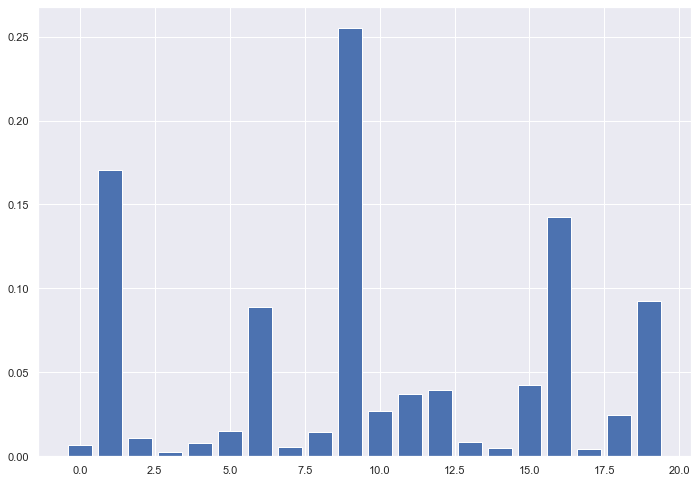

In [61]:
model = XGBRegressor()
# fit the model
model.fit(X_dummy, y_dummy1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v), f'{X_dummy.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Simple Linear Regression model for the Harmonic mean of Readiness and Vulnerability

Feature: 0, Score: -0.06095 Hazards.Exposure.Level
Feature: 1, Score: -0.02368 Risk.Health.System
Feature: 2, Score: -0.07156 Adaptation.Challenges.Index
Feature: 3, Score: -0.02688 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.04667 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.03561 Risk.Assessment.Actions
Feature: 6, Score: 0.02779 Adaptation.Plan
Feature: 7, Score: 0.01352 GHG.Emissions.Consumption
Feature: 8, Score: 0.01859 GHG.Emissions.External.Verification
Feature: 9, Score: 0.02511 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.03894 Opportunities.Collaboration
Feature: 11, Score: 0.01884 Renewable.Energy.Target
Feature: 12, Score: 0.01865 Energy.Efficnecy.Target
Feature: 13, Score: 0.02431 Water.Resource.Management.strategy
Feature: 14, Score: 0.01774 Low.Zero.Emission.Zone
Feature: 15, Score: 0.01164 GHG.Emissions.Evolution
Feature: 16, Score: 0.03371 GHG.Emissions.Reductions.Targets
Feature: 17, Score: 0.02653 Electricity.Source.Renew

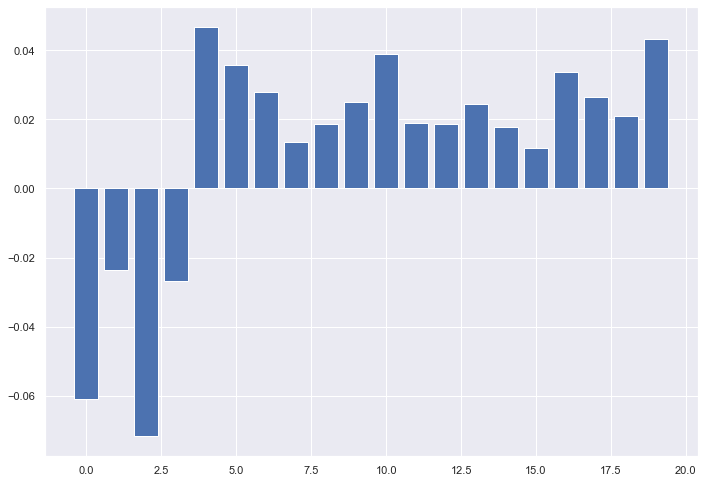

In [62]:
model = LinearRegression()
# fit the model
model.fit(X_dummy, y_dummy2)
# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v), f'{X_dummy.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### XGBoost Regression model for the Harmonic mean of Readiness and Vulnerability

[18:58:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.00211 Hazards.Exposure.Level
Feature: 1, Score: 0.00434 Risk.Health.System
Feature: 2, Score: 0.00625 Adaptation.Challenges.Index
Feature: 3, Score: 0.00469 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.01284 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.02791 Risk.Assessment.Actions
Feature: 6, Score: 0.03331 Adaptation.Plan
Feature: 7, Score: 0.00574 GHG.Emissions.Consumption
Feature: 8, Score: 0.01402 GHG.Emissions.External.Verification
Feature: 9, Score: 0.37656 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.05214 Opportunities.Collaboration
Feature: 11, Score: 0.02195 Renewable.Energy.Target
Feature: 12, Score: 0.01629 Energy.Efficnecy.Target
Feature: 13, Score: 0.01381 Water.Resource.Management.strategy
Feature: 14, Score: 0.00466 Low.Zero.Emission.Zone
Feature: 15, Score: 0.00846 GHG.Emissions.Evolution
F

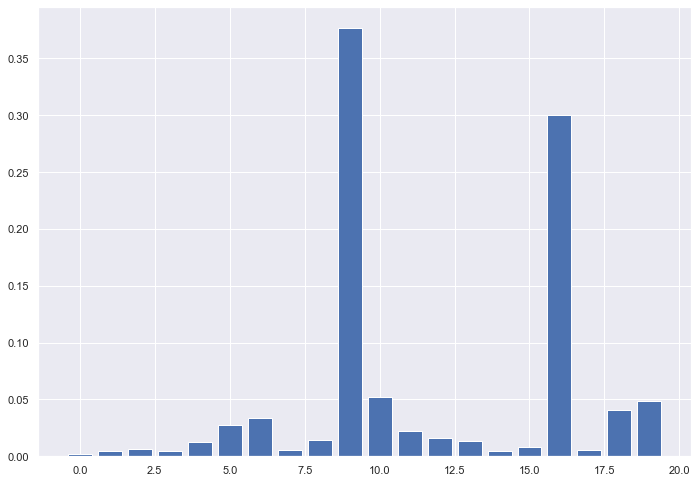

In [63]:
model = XGBRegressor()
# fit the model
model.fit(X_dummy, y_dummy2)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v), f'{X_dummy.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Feature selection according to features' importance when doing a PCA

#### We compute the PCA via the raw data that we encode again but we standard scale in difference to previously

In [64]:
data_for_pca = raw_index[['Hazards.Exposure.Level', 'Risk.Health.System', 'Adaptation.Challenges.Level','Potable.Water.Supply.Percent', 
               "Sustainability.Targets.Master.Planning", 
               "Risk.Assessment.Actions","Adaptation.Plan","GHG.Emissions.Consumption","GHG.Emissions.External.Verification",
               "Emissions.Reductions.Mitigation.Planning", "Opportunities.Collaboration","Renewable.Energy.Target",
               "Energy.Efficnecy.Target","Water.Resource.Management.strategy","Low.Zero.Emission.Zone","GHG.Emissions.Evolution",
               "GHG.Emissions.Reductions.Targets","Electricity.Source.Renewable", 
               "Food.Consumption.Policies","City.Wide.Emissions.Inventory"]].copy()

In [65]:
data_for_pca['Potable.Water.Supply.Percent'] = data_for_pca['Potable.Water.Supply.Percent'].apply(cleanan)

In [66]:
data_for_pca['Potable.Water.Supply.Vulnerability'] = 100-data_for_pca['Potable.Water.Supply.Percent']

In [67]:
data_for_pca['Adaptation.Challenges.Level'] = data_for_pca['Adaptation.Challenges.Level'].apply(cleanan)

In [68]:
data_for_pca['Adaptation.Challenges.Index'] = data_for_pca['Adaptation.Challenges.Level'].apply(minmax_adaptation)

In [69]:
data_for_pca['Sustainability.Targets.Master.Planning'] = data_for_pca['Sustainability.Targets.Master.Planning'].apply(note_sustainability_target)

In [70]:
bunch_col = ["Risk.Assessment.Actions","Adaptation.Plan" ,"City.Wide.Emissions.Inventory","GHG.Emissions.Consumption",
              "GHG.Emissions.External.Verification","Emissions.Reductions.Mitigation.Planning",
              "Opportunities.Collaboration","Renewable.Energy.Target","Energy.Efficnecy.Target",
              "Water.Resource.Management.strategy"]
for i in bunch_col:
    data_for_pca[i] = data_for_pca[i].apply(note_sustainability_target)

In [71]:
data_for_pca['Low.Zero.Emission.Zone'] = data_for_pca['Low.Zero.Emission.Zone'].apply(note_low_food)

In [72]:
data_for_pca['Food.Consumption.Policies'] = data_for_pca['Food.Consumption.Policies'].apply(note_low_food)

In [73]:
data_for_pca['GHG.Emissions.Reductions.Targets'] = data_for_pca['GHG.Emissions.Reductions.Targets'].apply(note_emi_red)

In [74]:
data_for_pca['GHG.Emissions.Evolution'] = data_for_pca['GHG.Emissions.Evolution'].apply(note_emi_evo)

In [75]:
data_for_pca['Electricity.Source.Renewable'] = data_for_pca['Electricity.Source.Renewable'].apply(cleanan)

In [76]:
data_for_pca['Risk.Health.System'] = data_for_pca['Risk.Health.System'].apply(note_low_food)

In [77]:
data_for_pca['Hazards.Exposure.Level'] = data_for_pca['Hazards.Exposure.Level'].apply(cleanan)

In [78]:
data_for_pca_mod = data_for_pca.drop(['Potable.Water.Supply.Percent', 'Adaptation.Challenges.Level'], axis = 1)

In [79]:
scaler = StandardScaler()
X = scaler.fit_transform(data_for_pca_mod)

#### Heatmap of the correlations within the original data that we encoded without the columns that we created

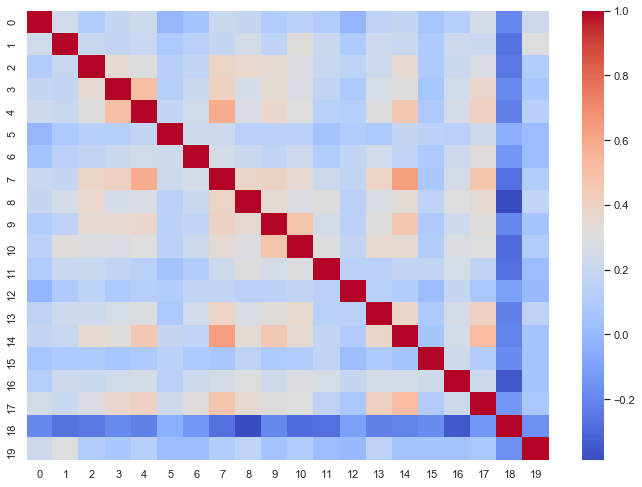

In [80]:
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

#### Beginning of the PCA

In [81]:
from sklearn.decomposition import PCA 
pca = PCA()
# find all Principal Components PC (no y!)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [82]:
# Print the PCs (as rows)
# Expressed as linear combination of initial vector basis (13 columns) 
Wt = pd.DataFrame(pca.components_)

In [83]:
Xp = pca.transform(X) # Dataset expressed/projected in the new PC basis. ( eq. X.dot(Wt.T))
pd.DataFrame(Xp)

0         1         2         3         4         5         6  \
0   -2.296004  0.245013  0.998623 -0.373197 -0.702785 -1.076735  0.253874   
1    1.135524  2.036469 -2.171493  0.543892  1.364938 -1.858627  2.281776   
2   -1.122037  1.840439 -0.792015  1.787353  1.938663  2.123335  0.682977   
3    1.642495 -2.966457  0.261078 -1.236825 -0.101172 -0.127940 -1.311551   
4   -3.005103 -1.035429 -0.632681  2.023569  0.212001 -0.741163 -0.247793   
..        ...       ...       ...       ...       ...       ...       ...   
561 -2.597685  0.479099  0.046567 -1.282635  0.003293 -0.746738  1.034067   
562 -2.263549  1.351737 -1.834902 -0.577018  0.011811  1.108889 -0.618098   
563  3.685525  0.427017  0.123689  0.161824 -0.845975  0.179422 -0.341375   
564  2.444235  2.069917 -0.617416 -0.165788 -0.515580 -0.695271  0.488700   
565  3.282842  0.624029  0.770528  0.215602 -0.065815  0.907403  0.336999   

            7         8         9        10        11        12        13  \
0    0.318610 -1.263364 -1.277868 -0.765642  0.279997 -0.665855 -0.588051   
1    1.007225 -1.395660 -0.429654  0.567350  0.513591  0.477366 -0.715969   
2   -0.959394  1.078614 -0.557847  1.290360 -0.521927 -0.473804  0.664864   
3   -1.241442 -1.127949 -0.482434  0.077146 -0.329417  0.051728  0.328706   
4    0.135292  0.027804 -0.601763 -1.508066  0.948602 -0.850546 -0.479157   
..        ...       ...       ...       ...       ...       ...       ...   
561 -0.473313 -0.011077 -0.250006 -0.580609 -0.146005 -0.746206 -0.704447   
562 -0.991791 -1.530271  1.517097  0.841629 -0.422942 -0.680621  0.984736   
563 -1.340649  0.106858 -1.124034 -0.664000 -0.306579 -1.126504  0.146478   
564  0.957496  0.394644  0.899306 -1.339078 -1.463638 -0.195513 -0.500148   
565 -1.680682 -0.528168 -0.152628 -1.322763 -0.765072  2.533906  0.059794   

           14        15        16        17        18        19  
0   -0.311100  0.338661  0.394221 -0.082923 -0.281977 -0.469586  
1    0.201646  0.846597  0.510916 -0.330203  0.996882 -0.383708  
2   -0.471269 -0.014218 -0.300755 -0.453966  0.487450 -0.472806  
3   -0.862528 -0.774158 -1.379719  0.071728 -0.640355 -0.056243  
4    0.311681  0.344828 -0.990182 -0.028296  0.071858 -0.139351  
..        ...       ...       ...       ...       ...       ...  
561  0.195043  0.153643 -0.210384 -0.321974  0.564331  0.366133  
562 -0.278759  0.590869  0.245339 -0.208650 -0.314657  0.032120  
563  0.862543  0.362018 -0.362419  0.757956 -0.685566 -0.153667  
564 -1.588731  0.281962 -0.690812 -0.116944 -0.787607  1.201367  
565  1.104825  0.081509 -0.136593  0.365882  0.271488  0.779555  

[566 rows x 20 columns]

#### Heatmap of the correlations of the vectors obtained via the PCA, everything is at 0 because we are in presence of eigenvectors. First check that our PCA is successful

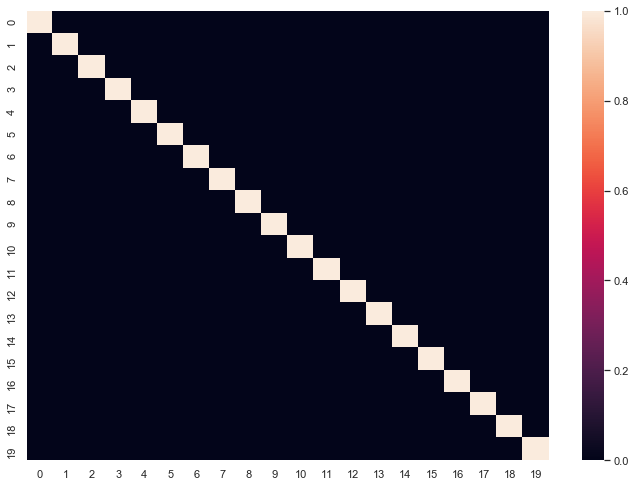

In [84]:
# As expected, the PCA reduces multicolinearity to its maximum! # (to the detriment of interpretability) 
sns.heatmap(pd.DataFrame(Xp).corr())

#### Second check that our PCA is successful

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
df = pd.DataFrame()
df["vif_index"] = [vif(Xp, i) for i in range(Xp.shape[1])]

In [86]:
# Let's compute it
df_Xp = pd.DataFrame(Xp)
df_Xp.std()**2 / ((df_Xp.std()**2).sum())

0     0.271584
1     0.075264
2     0.066930
3     0.055247
4     0.050970
5     0.044633
6     0.044381
7     0.040645
8     0.040027
9     0.039393
10    0.036697
11    0.033410
12    0.032403
13    0.030586
14    0.028774
15    0.028373
16    0.023634
17    0.022747
18    0.019236
19    0.015064
dtype: float64

In [87]:
# Find principal components
eig_vals, eig_vecs = np.linalg.eig(np.dot(X.T,X))

In [88]:
# Sklearn provides it automatically 
pca.explained_variance_ratio_

array([0.27158394, 0.07526365, 0.06692975, 0.05524749, 0.05096979,
       0.04463301, 0.0443808 , 0.0406455 , 0.04002714, 0.03939304,
       0.03669709, 0.03341007, 0.03240332, 0.03058598, 0.0287742 ,
       0.02837319, 0.02363443, 0.02274702, 0.01923614, 0.01506445])

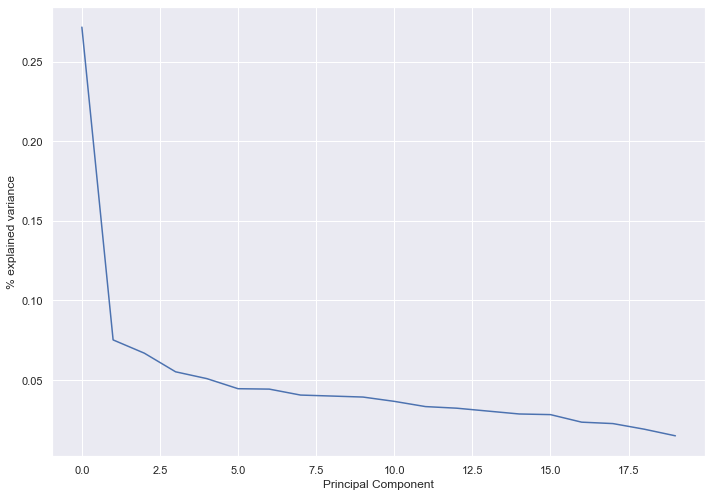

In [89]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

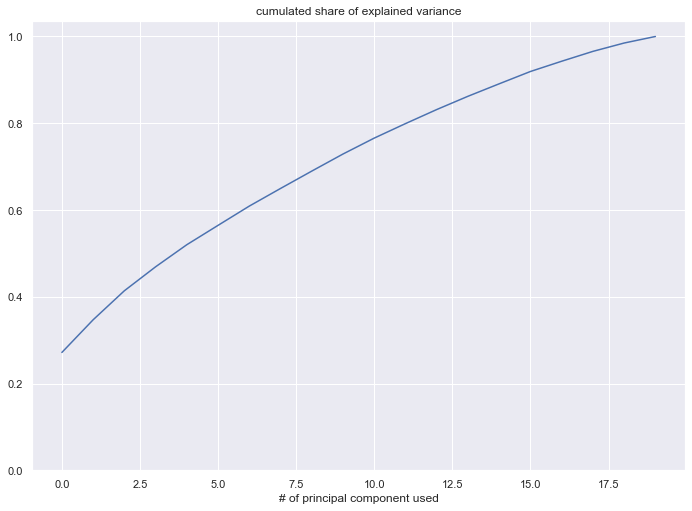

In [90]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance') 
plt.xlabel('# of principal component used');

### PCA with only 2 principal components

In [91]:
pca2 = PCA(n_components=2).fit(X) # Print our 2 principal components
pd.DataFrame(pca2.components_)

0         1         2         3         4         5         6  \
0 -0.147122 -0.188775 -0.239921 -0.252137 -0.284708 -0.128718 -0.177790   
1  0.183259  0.357546 -0.020008 -0.173862 -0.217256 -0.175989 -0.098393   

          7         8         9        10        11        12        13  \
0 -0.318909 -0.262837 -0.267994 -0.262415 -0.177697 -0.115329 -0.247784   
1 -0.227512  0.172037 -0.121026  0.092903  0.294746  0.014125 -0.047510   

         14        15        16        17        18        19  
0 -0.295030 -0.099365 -0.218589 -0.279097  0.206459 -0.096889  
1 -0.256908  0.268052  0.239143 -0.246209 -0.401785  0.330203

In [92]:
Xp2 = pca2.fit_transform(X)
pd.DataFrame(Xp2)

0         1
0   -2.295993  0.240422
1    1.135506  2.043119
2   -1.122133  1.824519
3    1.642479 -2.978647
4   -3.005103 -1.031087
..        ...       ...
561 -2.597704  0.479353
562 -2.263682  1.339253
563  3.685518  0.413069
564  2.444226  2.059838
565  3.282987  0.636241

[566 rows x 2 columns]

In [93]:
X_reconstructed = pca2.inverse_transform(Xp2) 
X_reconstructed.shape

(566, 20)

### PCA with only 3 principal components

In [94]:
pca3 = PCA(n_components=3).fit(X) # Print our 3 principal components
pd.DataFrame(pca3.components_)

0         1         2         3         4         5         6  \
0 -0.147133 -0.188755 -0.239923 -0.252129 -0.284709 -0.128721 -0.177792   
1  0.177159  0.356596 -0.019915 -0.174106 -0.224207 -0.176079 -0.112108   
2  0.458069  0.209551 -0.032575  0.096992  0.155153 -0.250408 -0.218545   

          7         8         9        10        11        12        13  \
0 -0.318916 -0.262839 -0.267990 -0.262422 -0.177690 -0.115341 -0.247786   
1 -0.230713  0.188769 -0.119551  0.088392  0.293947  0.025893 -0.044955   
2  0.083065 -0.039882 -0.086872 -0.096136 -0.268706 -0.355822  0.077059   

         14        15        16        17        18        19  
0 -0.295028 -0.099376 -0.218571 -0.279092  0.206474 -0.096892  
1 -0.255032  0.272883  0.235969 -0.238382 -0.395194  0.329618  
2  0.088785 -0.259521 -0.275054  0.114767  0.051411  0.452239

### Analysis of our PCA results

In [95]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

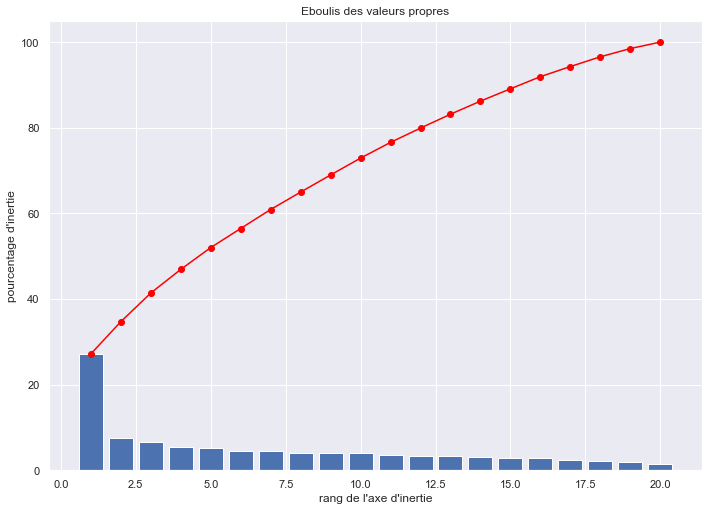

In [96]:
display_scree_plot(pca)

In [97]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(15,15))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey", alpha = 0.5)
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

## Correlation circle between principal components and the features

#### Correlation circle between second and third principal components and the features

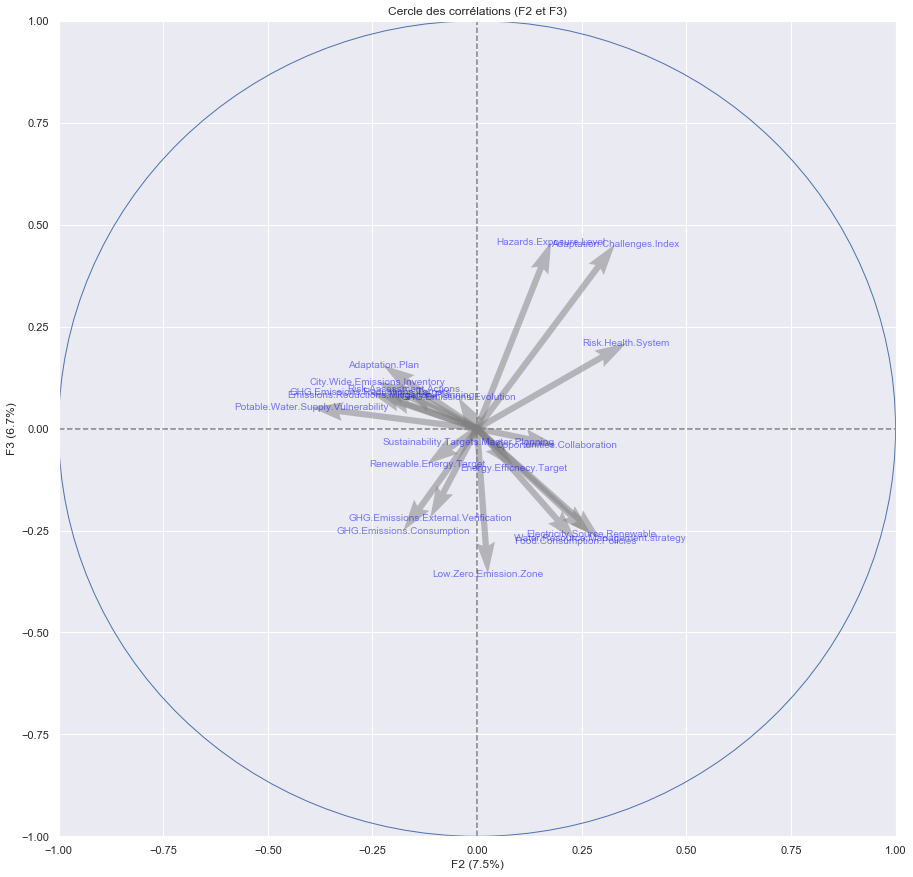

In [98]:
n_comp = 3
pcs = pca3.components_
display_circles(pcs, n_comp, pca3, [(1,2)], labels = np.array(data_for_pca_mod.columns))

#### Correlation circle between first and third principal components and the features

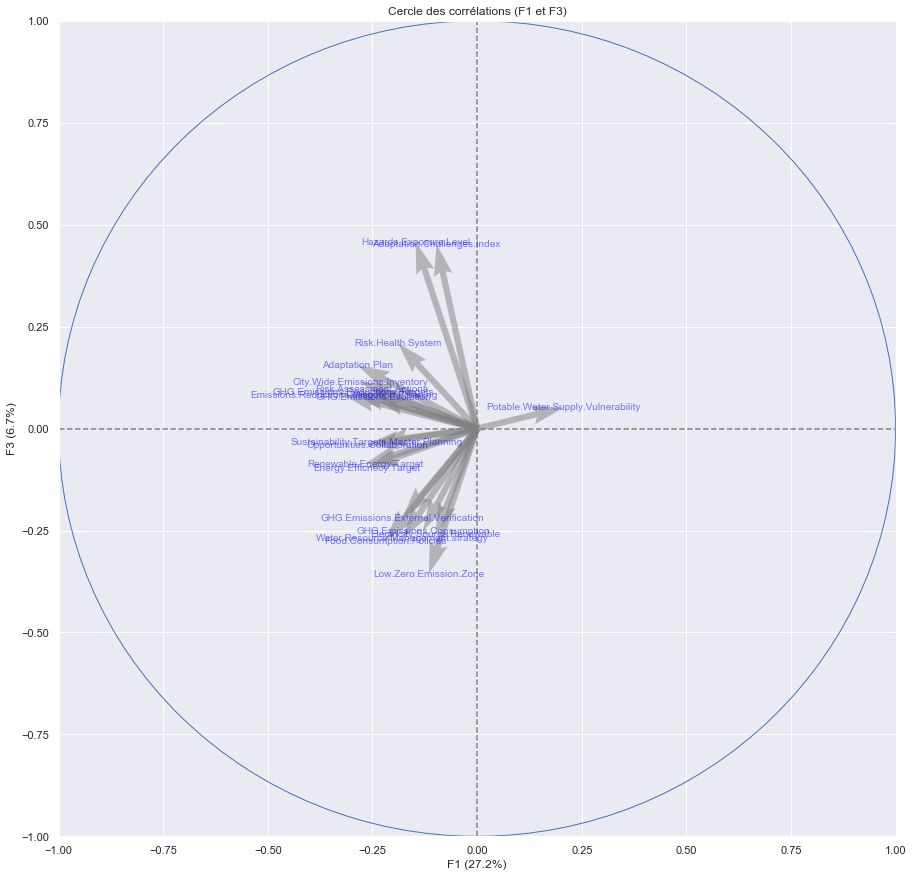

In [99]:
display_circles(pcs, n_comp, pca3, [(0,2)], labels = np.array(data_for_pca_mod.columns))

#### Correlation circle between first and second principal components and the features

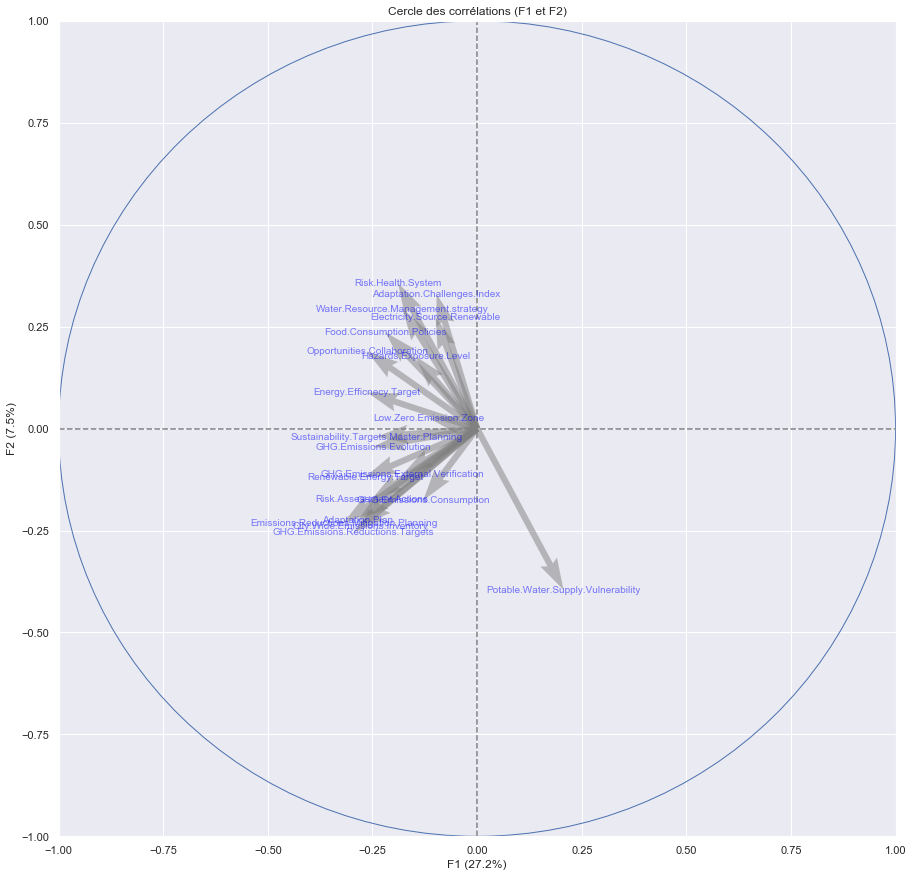

In [100]:
display_circles(pcs, n_comp, pca3, [(0,1)], labels = np.array(data_for_pca_mod.columns))

### Another form of PCA

In [101]:
scaler = StandardScaler()
Z = scaler.fit_transform(data_for_pca_mod)

In [102]:
acp = PCA(svd_solver='full')

In [103]:
#nombre d'observations
n = data_for_pca_mod.shape[0]
#nombre de variables
p = data_for_pca_mod.shape[1]
coord = acp.fit_transform(Z)
eigval = (n-1)/n*acp.explained_variance_

In [104]:
bs = 1/np.arange(p,0,-1) 
bs = np.cumsum(bs)
bs = bs[::-1]

In [105]:
di = np.sum(Z**2,axis=1)

In [106]:
cos2 = coord**2 
for j in range(p):
    #print(j)
    cos2[:,j] = cos2[:,j]/di 
#print(pd.DataFrame({'id':data_for_pca_mod.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1], 'COS2_3':cos2[:,2]}))

In [107]:
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j]) 
#print(pd.DataFrame({'id':data_for_pca_mod.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

In [108]:
sqrt_eigval = np.sqrt(eigval)

In [109]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
#afficher la matrice des corrélations variables x facteurs
#print(corvar)

In [110]:
#Corrélation des variables avec les axes
cor_pca = pd.DataFrame({'id':data_for_pca_mod.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1], 'COR_3':corvar[:,2]})

In [111]:
cos2var = corvar**2 
# Qualité de représentation des variables
cos2var_pca = pd.DataFrame({'id':data_for_pca_mod.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1], 'COS2_3':cos2var[:,2]})

In [112]:
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#Contribution des variables aux axes
contri = pd.DataFrame({'id':data_for_pca_mod.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1], 'CTR_3':ctrvar[:,2]})

In [113]:
# We create a column where we summup the contribution of each features for the first three principal components
contri['sum'] = contri['CTR_1']+contri['CTR_2']+contri['CTR_3']

In [114]:
# We create a ranking of each features according to the summup contribution to the first three principal components
sum_contri = pd.DataFrame(contri['sum'].rank(ascending = False))
sum_contri.index = contri.id
sum_contri

sum
id                                            
Hazards.Exposure.Level                     2.0
Risk.Health.System                         4.0
Sustainability.Targets.Master.Planning    20.0
Risk.Assessment.Actions                   15.0
Adaptation.Plan                            9.0
GHG.Emissions.Consumption                 13.0
GHG.Emissions.External.Verification       17.0
Emissions.Reductions.Mitigation.Planning   7.0
Opportunities.Collaboration               14.0
Renewable.Energy.Target                   16.0
Energy.Efficnecy.Target                   18.0
Water.Resource.Management.strategy         5.0
Low.Zero.Emission.Zone                    12.0
GHG.Emissions.Evolution                   19.0
GHG.Emissions.Reductions.Targets           8.0
Electricity.Source.Renewable              10.0
Food.Consumption.Policies                  6.0
City.Wide.Emissions.Inventory             11.0
Potable.Water.Supply.Vulnerability         3.0
Adaptation.Challenges.Index                1.0

In [115]:
# We create a ranking of each features according to the contribution to each of the first three principal components
rank_contri = pd.concat([contri['CTR_1'].rank(ascending = False),contri['CTR_2'].rank(ascending = False),contri['CTR_3'].rank(ascending = False)], axis = 1)
rank_contri.index = contri.id
#rank_contri

In [116]:
# We create a ranking of each features according to the correlation to each of the first three principal components
rank_cor = pd.concat([cor_pca['COR_1'].rank(ascending = False),cor_pca['COR_2'].rank(ascending = False),cor_pca['COR_3'].rank(ascending = False)], axis = 1)
rank_cor.index = cor_pca.id
rank_cor

COR_1  COR_2  COR_3
id                                                           
Hazards.Exposure.Level                      6.0    7.0    1.0
Risk.Health.System                          9.0    1.0    3.0
Sustainability.Targets.Master.Planning     11.0   10.0   11.0
Risk.Assessment.Actions                    13.0   15.0    6.0
Adaptation.Plan                            18.0   16.0    4.0
GHG.Emissions.Consumption                   5.0   14.0   16.0
GHG.Emissions.External.Verification         8.0   12.0   15.0
Emissions.Reductions.Mitigation.Planning   20.0   17.0    8.0
Opportunities.Collaboration                15.0    6.0   12.0
Renewable.Energy.Target                    16.0   13.0   13.0
Energy.Efficnecy.Target                    14.0    8.0   14.0
Water.Resource.Management.strategy          7.0    3.0   18.0
Low.Zero.Emission.Zone                      4.0    9.0   20.0
GHG.Emissions.Evolution                    12.0   11.0    9.0
GHG.Emissions.Reductions.Targets           19.0   19.0    7.0
Electricity.Source.Renewable                3.0    4.0   17.0
Food.Consumption.Policies                  10.0    5.0   19.0
City.Wide.Emissions.Inventory              17.0   18.0    5.0
Potable.Water.Supply.Vulnerability          1.0   20.0   10.0
Adaptation.Challenges.Index                 2.0    2.0    2.0

In [117]:
# We create a ranking of each features according to the quality of representation of the variables to each of the first three principal components
rank_co2var = pd.concat([cos2var_pca['COS2_1'].rank(ascending = False),cos2var_pca['COS2_2'].rank(ascending = False),cos2var_pca['COS2_3'].rank(ascending = False)], axis = 1)
rank_co2var.index = cos2var_pca.id
#rank_co2var

### SVM model for features selection according to our Targets

In [118]:
X_dummy = data_for_pca_mod.copy()
y_dummy1 = raw_index['City.Readiness.Index']
y_dummy2 = raw_index['Vulnerability']

#### SVM model for Readiness

In [119]:
# Create the RFE object and compute a cross-validated score.
svr = SVR(kernel="linear")

In [120]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv1 = RFECV(estimator=svr, step=1, cv=10,
              min_features_to_select=min_features_to_select)
rfecv1.fit(X_dummy, y_dummy1)

print("Optimal number of features : %d" % rfecv1.n_features_)

Optimal number of features : 12


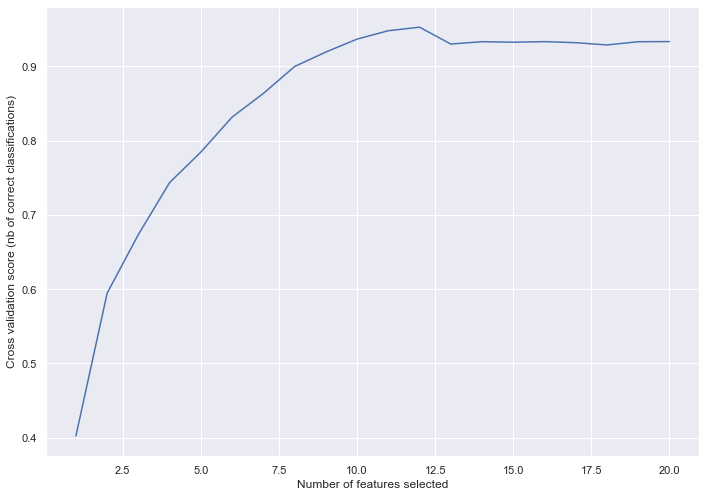

In [121]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv1.grid_scores_) + min_features_to_select),
         rfecv1.grid_scores_)
plt.show()

In [122]:
rank_nico1 = pd.concat([pd.Series(X_dummy.columns),pd.Series(rfecv1.ranking_)], axis = 1)
rrank1 = rank_nico1.sort_values(1)

<BarContainer object of 20 artists>

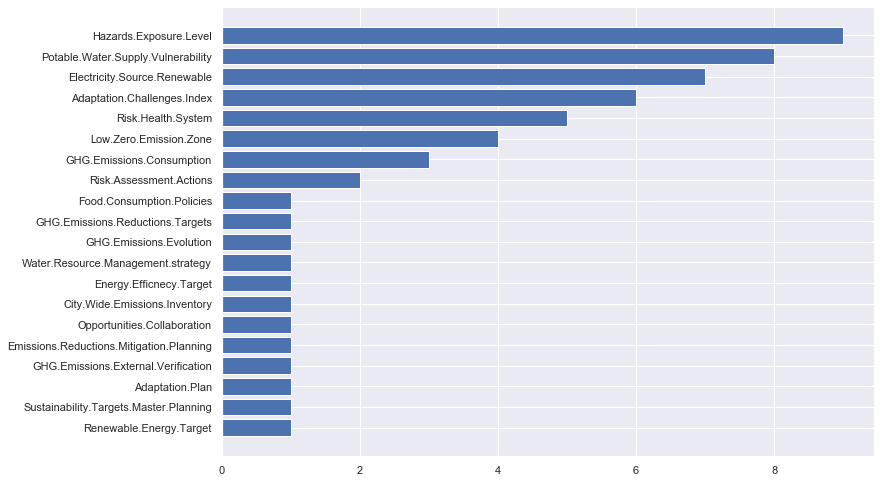

In [123]:
plt.barh(rrank1[0], rrank1[1])

##### When a feature is ranked at 1 so has the smallest bar on the above chart, it means that it is among the most important features to explain the target

#### SVM model for Vulnerability

In [124]:
# Create the RFE object and compute a cross-validated score.
svr = SVR(kernel="linear")

In [125]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svr, step=1, cv=10,
              min_features_to_select=min_features_to_select)
rfecv.fit(X_dummy, y_dummy2)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 20


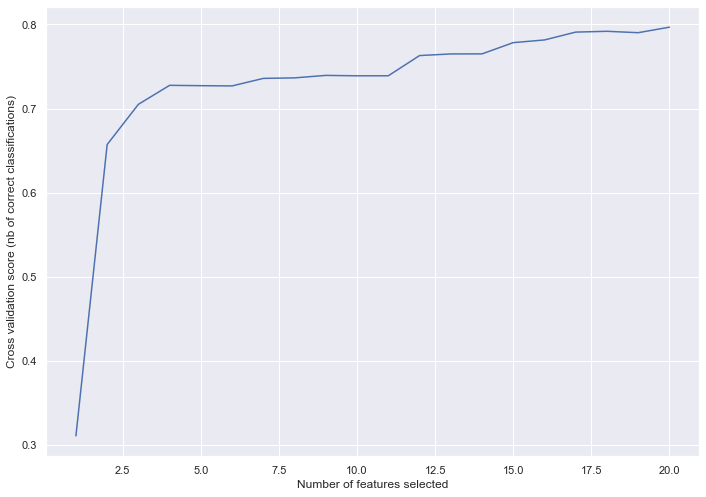

In [126]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [127]:
rank_nico2 = pd.concat([pd.Series(X_dummy.columns),pd.Series(rfecv.ranking_)], axis = 1)
rrank2 = rank_nico2.sort_values(1)

<BarContainer object of 20 artists>

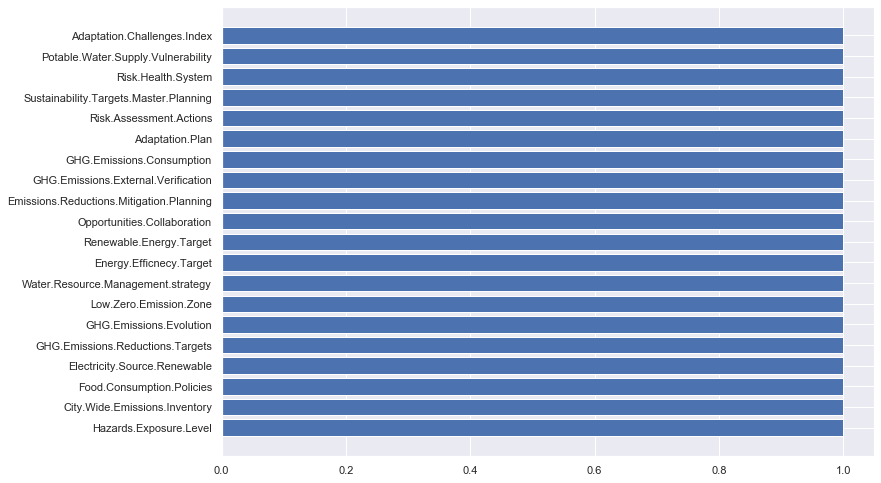

In [128]:
plt.barh(rrank2[0], rrank2[1])

##### When a feature is ranked at 1 so has the smallest bar on the above chart, it means that it is among the most important features to explain the target

# Pipeline and ML models

### We selected 10 features from our analysis to train our Machine Learning model on

In [129]:
col_to_use=[
'Hazards.Exposure.Level',
'Risk.Health.System',
'Adaptation.Plan',
'Emissions.Reductions.Mitigation.Planning',
'Water.Resource.Management.strategy',
'GHG.Emissions.Reductions.Targets',
'Food.Consumption.Policies',
'Potable.Water.Supply.Percent',
'Adaptation.Challenges.Level',
'Electricity.Source.Renewable']

In [130]:
class CustomScaler(TransformerMixin, BaseEstimator): 
# TransformerMixin generates a fit_transform method from fit and transform
# BaseEstimator generates get_params and set_params methods
    def __init__(self):
        pass
        
    
    
    def fit(self, X, y=None):
        self.means = X.mean()
        self.max = X.max()
        self.min = X.min()
        return self
    
    def transform(self, X, y=None):
        
        X= 100 - X
        X_transformed = (X - self.min)/(self.max-self.min) 
        # Return result as dataframe for integration into ColumnTransformer
        return pd.DataFrame(X_transformed)

### Selection of the data and splitting into train/test dataset

In [131]:
X = kpi[col_to_use].copy()
X['Potable.Water.Supply.Vulnerability']=kpi_new['Potable.Water.Supply.Vulnerability']
y = dummy_kpi['Harmonic_Index']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X[col_to_use],y, test_size=0.3, random_state=1)

In [133]:
numcol=['Hazards.Exposure.Level','Potable.Water.Supply.Percent','Adaptation.Challenges.Level','Electricity.Source.Renewable']

### Simple Linear Regression model

In [134]:
reg=LinearRegression()

customscaler = CustomScaler()

water_transform = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0.0)),
                            ('scaler', customscaler)])

num_transformer = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0)),
                            ('scaler', MinMaxScaler())])

cat_transformer = Pipeline( [ ('imputer',SimpleImputer(strategy='constant',fill_value='No')),
                            ('scaler',OneHotEncoder(handle_unknown='ignore'))
                            ])

preprocessor = ColumnTransformer([
    ('water_transformer', water_transform,['Potable.Water.Supply.Percent']),
    ('num_transformer', num_transformer,  make_column_selector(dtype_include=['float64'])),
    ('cat_transformer', cat_transformer,  make_column_selector(dtype_include=['object']))
    
    ])


final_pipel = Pipeline([
    ('preprocessing', preprocessor),
    ('linear_regression', reg)])

In [135]:
final_pipe_trained = final_pipel.fit(X_train,y_train)

In [136]:
cross_val_score(final_pipel, X_train, y_train, cv=10, scoring='r2')

array([0.75953323, 0.70747177, 0.71875749, 0.5781672 , 0.63498704,
       0.83680658, 0.78237953, 0.70758783, 0.73796799, 0.86087923])

In [137]:
learning_curves_elements = pd.DataFrame(columns=['train_score', 'test_score', 'train_size'])
X_train, X_test, y_train, y_test = train_test_split(X[col_to_use],y, test_size=0.3, random_state=1)
X_train['target']= y_train
data_train = X_train.copy()

In [138]:
train_sizes = [10,50,100,200,300]
for size in train_sizes:
    
 # Sample the training set
    data_train_sample = data_train.sample(size, random_state = 1)
    #print(data_train_sample.drop(0, 1))
    # Prepare X and y
    X_train = data_train_sample.drop("target", 1)
    y_train = data_train_sample["target"]
    
    # Train the model on the sampled Train data
    model = final_pipel.fit(X_train,y_train)
    # Score the model on the train data (sampled) and test data (fixed)
    test_score =   model.score(X_test,y_test)
    train_score =  model.score(X_train,y_train)
    
    # Append associated train score, test score, and train size to dataframe
    learning_curves_elements = learning_curves_elements.append({'train_score': train_score,
                                  'test_score': test_score,
                                   'train_size': size}, ignore_index=True)

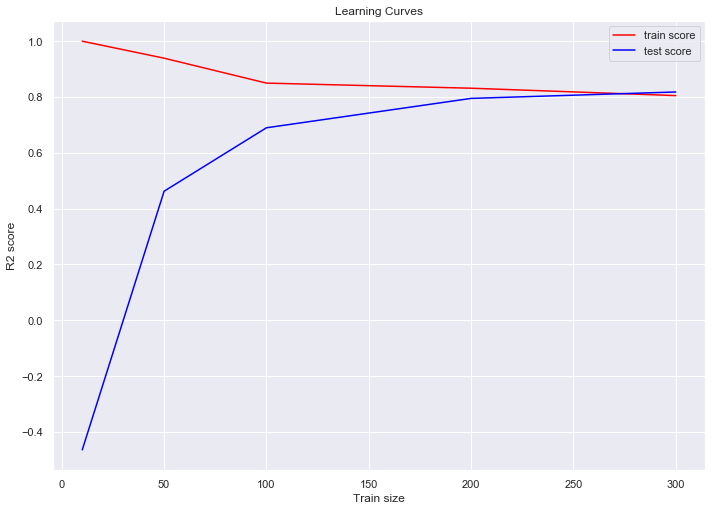

In [139]:
plt.plot(learning_curves_elements.train_size,learning_curves_elements.train_score,  color = 'red', label='train score')
plt.plot(learning_curves_elements.train_size,learning_curves_elements.test_score, color = 'blue', label='test score')
plt.title('Learning Curves')
plt.xlabel('Train size')
plt.ylabel('R2 score')
plt.legend()
plt.show()

### Ridge Regression model

In [140]:
X = kpi[col_to_use].copy()
X['Potable.Water.Supply.Vulnerability']=kpi_new['Potable.Water.Supply.Vulnerability']
y = dummy_kpi['Harmonic_Index']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X[col_to_use],y, test_size=0.3, random_state=1)

In [142]:
reg_ridge=Ridge()

customscaler_rid = CustomScaler()

water_transform_rid = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0.0)),
                            ('scaler', customscaler_rid)])

num_transformer_rid = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0)),
                            ('scaler', MinMaxScaler())])

cat_transformer_rid = Pipeline( [ ('imputer',SimpleImputer(strategy='constant',fill_value='No')),
                            ('scaler',OneHotEncoder(handle_unknown='ignore'))
                            ])

preprocessor_rid = ColumnTransformer([
    ('water_transformer', water_transform_rid,['Potable.Water.Supply.Percent']),
    ('num_transformer', num_transformer_rid,  make_column_selector(dtype_include=['float64'])),
    ('cat_transformer', cat_transformer_rid,  make_column_selector(dtype_include=['object']))
    
    ])


final_pipel_rid = Pipeline([
    ('preprocessing', preprocessor_rid),
    ('linear_regression', reg_ridge)])

In [143]:
ridge_trained = final_pipel_rid.fit(X_train,y_train)

In [144]:
cross_val_score(final_pipel_rid, X_train, y_train, cv=10, scoring='r2')

array([0.75891349, 0.70729868, 0.71788696, 0.58832574, 0.64480173,
       0.83490778, 0.78303977, 0.71339609, 0.73568635, 0.8650454 ])

## Nearest Neighbors model

In [145]:
X = kpi[col_to_use].copy()
X['Potable.Water.Supply.Vulnerability']=kpi_new['Potable.Water.Supply.Vulnerability']
y = dummy_kpi['Harmonic_Index']
X =X[col_to_use]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [146]:
Nn = NearestNeighbors(n_neighbors=3)

#### Test with a made-up city

In [147]:
pred=np.array([100.0,'No','Yes','Yes','No','No target','Yes',0.0,3.0,25.0]).reshape(1,10)
pred = pd.DataFrame(data=pred,columns=col_to_use)
pred[numcol] = pred[numcol].apply(pd.to_numeric, errors = 'coerce')

In [148]:
customscalerN = CustomScaler()

water_transformN = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0.0)),
                            ('scaler', customscalerN)])

num_transformerN = Pipeline([('imputer', SimpleImputer(strategy = 'constant',fill_value=0)),
                            ('scaler', MinMaxScaler())])

cat_transformerN = Pipeline( [ ('imputer',SimpleImputer(strategy='constant',fill_value='No')),
                            ('scaler',OneHotEncoder(handle_unknown='ignore'))
                            ])

preprocessorN = ColumnTransformer([
    ('water_transformer', water_transformN,['Potable.Water.Supply.Percent']),
    ('num_transformer', num_transformerN,  make_column_selector(dtype_include=['float64'])),
    ('cat_transformer', cat_transformerN,  make_column_selector(dtype_include=['object']))
    
    ])
  

nearest = Pipeline([
    ('preprocessing', preprocessorN),
    
    ('knn', Nn)
])


In [149]:
nearest_trained = nearest.fit(X)
nearest_scale=nearest_trained.steps[0][1].transform(pred)

In [150]:
voisin = nearest_trained.steps[1][1].kneighbors(nearest_scale,n_neighbors=5)
ville_voisine = voisin[1][0]

In [151]:
raw_index.iloc[ville_voisine]

Unnamed: 0  Year.Reported.to.CDP  Account.Number  \
216         237                  2020          826103   
144         158                  2020           60374   
475         515                  2020           35878   
158         173                  2020           54111   
37           41                  2020           43911   

                          Organization               City  \
216  Ayuntamiento de Casimiro Castillo  Casimiro Castillo   
144                 Alcaldía de Ibagué             Ibagué   
475                 City of Sacramento         Sacramento   
158                  City of Iowa City          Iowa City   
37                      City of Ottawa             Ottawa   

                      Country     CDP.Region First.Time.Discloser  Population  \
216                    Mexico  Latin America                   No     21475.0   
144                  Colombia  Latin America                   No    564077.0   
475  United States of America  North America                   No    513624.0   
158  United States of America  North America                   No     76290.0   
37                     Canada  North America                   No    991429.0   

                City.Location Sustainability.Targets.Master.Planning  \
216  POINT (-104.436 19.6031)                            In progress   
144    POINT (-75.24 4.44851)                                    Yes   
475  POINT (-121.494 38.5816)                                    Yes   
158  POINT (-91.5302 41.6611)                                    Yes   
37   POINT (-75.6972 45.4215)                                    Yes   

                        Risk.Assessment.Actions  Nb.Hazards.Type  \
216                                         Yes              1.0   
144  Intending to undertake in the next 2 years              3.0   
475                                 In progress              5.0   
158                                         Yes             10.0   
37                                  In progress              4.0   

     Hazards.Exposure.Level  Adaptation.Challenges.Health  \
216                    25.0                           NaN   
144                    40.0                           NaN   
475                    59.0                           NaN   
158                   133.0                           NaN   
37                     90.0                           NaN   

     Adaptation.Challenges.Economic  Adaptation.Challenges.Environment  \
216                             NaN                                NaN   
144                             NaN                                NaN   
475                             NaN                                NaN   
158                             NaN                                NaN   
37                              NaN                                NaN   

     Adaptation.Challenges.Infrastructure  Adaptation.Challenges.Social  \
216                                   NaN                           NaN   
144                                   NaN                           NaN   
475                                   NaN                           NaN   
158                                   NaN                           NaN   
37                                    NaN                           NaN   

     Adaptation.Challenges.Governance  Adaptation.Challenges.Education  \
216                               NaN                              NaN   
144                               NaN                              NaN   
475                               NaN                              NaN   
158                               NaN                              NaN   
37                                NaN                              NaN   

     Adaptation.Challenges.Level Risk.Health.System  Nb.Adaptation.Actions  \
216                          NaN                NaN                      1   
144                          NaN                NaN                      3   
475                     

df = raw_index.copy()
for i in ville_voisine:
    icity= df.iloc[i]
    lat=icity[55]
    lon=icity[56]
    txt=f'readiness score:{icity[58]} \n vulnerability score:{icity[59]} \n Orga:{icity[3]}'
    print(txt)
    #folium.Marker(
    folium.CircleMarker(
    location=[lat,lon],
    popup=txt,
    #icon=folium.Icon(color=couleur)
    radius=5,
    color="green",
    fill=True,
    fill_color='gray'
    ).add_to(m)